In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import boto3

import warnings
warnings.filterwarnings("ignore") 

In [124]:
s3 = boto3.client('s3')

s3 = boto3.resource(
    service_name='s3',
    region_name='ap-south-1',
    aws_access_key_id='',
    aws_secret_access_key=''
)

In [125]:
obj = s3.Bucket('meet-db').Object('marketing_campaign.csv').get()
data = pd.read_csv(obj['Body'], delimiter="\t")
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [5]:
data = pd.read_csv('C:/Users/meetp/#PYTHON FILES/Customer Segmentation Clustering/artifacts/marketing_campaign.csv')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [7]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


#### Handling Null Vallues & Duplicates if they Exist

In [8]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [9]:
data.dropna(subset=['Income'], inplace=True)

In [10]:
data.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [11]:
data[data.duplicated()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


In [12]:
data.reset_index(drop=True, inplace=True)

## 

#### Feature Selection

In [13]:
current_year = pd.Timestamp.now().year
data['Age'] = current_year - data['Year_Birth']

data["Marital_Status"]=data["Marital_Status"].replace({"Married":"Partner","Together":"Partner","Absurd":"Single", "YOLO":"Single","Widow":"Single", "Divorced":"Single", "Alone":"Single"})
data['Education'] = data['Education'].replace({"Basic":"UnderGraduate","2n Cycle":"UnderGraduate"})

data.insert(3, 'Age', data.pop('Age'))
data.insert(1, 'Dt_Customer', data.pop('Dt_Customer'))
data.insert(5, 'Income', data.pop('Income'))

## 

In [14]:
data.drop(['ID','Z_CostContact','Year_Birth','Z_Revenue','Complain','NumWebVisitsMonth'], axis=1, inplace=True)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216 entries, 0 to 2215
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Dt_Customer          2216 non-null   object 
 1   Education            2216 non-null   object 
 2   Age                  2216 non-null   int64  
 3   Income               2216 non-null   float64
 4   Marital_Status       2216 non-null   object 
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Recency              2216 non-null   int64  
 8   MntWines             2216 non-null   int64  
 9   MntFruits            2216 non-null   int64  
 10  MntMeatProducts      2216 non-null   int64  
 11  MntFishProducts      2216 non-null   int64  
 12  MntSweetProducts     2216 non-null   int64  
 13  MntGoldProds         2216 non-null   int64  
 14  NumDealsPurchases    2216 non-null   int64  
 15  NumWebPurchases      2216 non-null   i

In [16]:
data.shape

(2216, 24)

In [17]:
from scipy.stats import zscore
import numpy as np

data = data[(np.abs(zscore(data['Age'])) < 3) & (np.abs(zscore(data['Income'])) < 3)]
data.reset_index(drop=True, inplace=True)

In [18]:
data.shape

(2205, 24)

In [19]:
df = data.copy()

## EDA

#### 1) Customer's Distribution by Age, Income, Marital_Status, Education

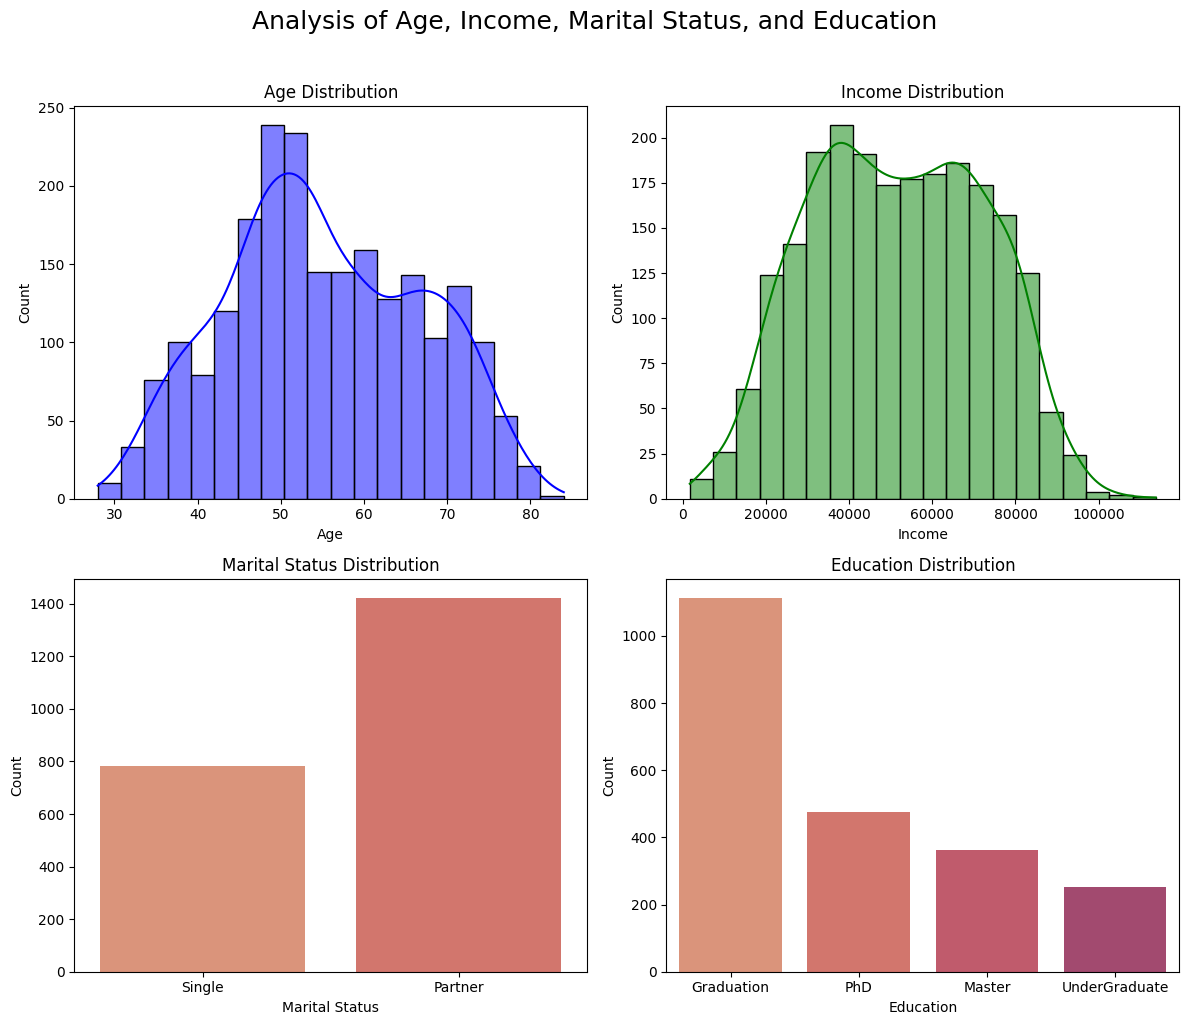

In [20]:
palette = sns.color_palette("flare")

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

sns.histplot(df['Age'], bins=20, kde=True, ax=axs[0, 0], palette=palette, color='blue')
axs[0, 0].set_title('Age Distribution')
axs[0, 0].set_xlabel('Age')

sns.histplot(df['Income'], bins=20, kde=True, ax=axs[0, 1], palette=palette, color='green')
axs[0, 1].set_title('Income Distribution')
axs[0, 1].set_xlabel('Income')

sns.countplot(data=df, x='Marital_Status', ax=axs[1, 0], palette=palette)
axs[1, 0].set_title('Marital Status Distribution')
axs[1, 0].set_xlabel('Marital Status')
axs[1, 0].set_ylabel('Count')

sns.countplot(data=df, x='Education', ax=axs[1, 1], palette=palette)
axs[1, 1].set_title('Education Distribution')
axs[1, 1].set_xlabel('Education')
axs[1, 1].set_ylabel('Count')

plt.suptitle('Analysis of Age, Income, Marital Status, and Education', fontsize=18, y=1.02)

plt.tight_layout()
plt.show()

#### 2) Total Amount of Yearly Spending between Last 2 years on each Products

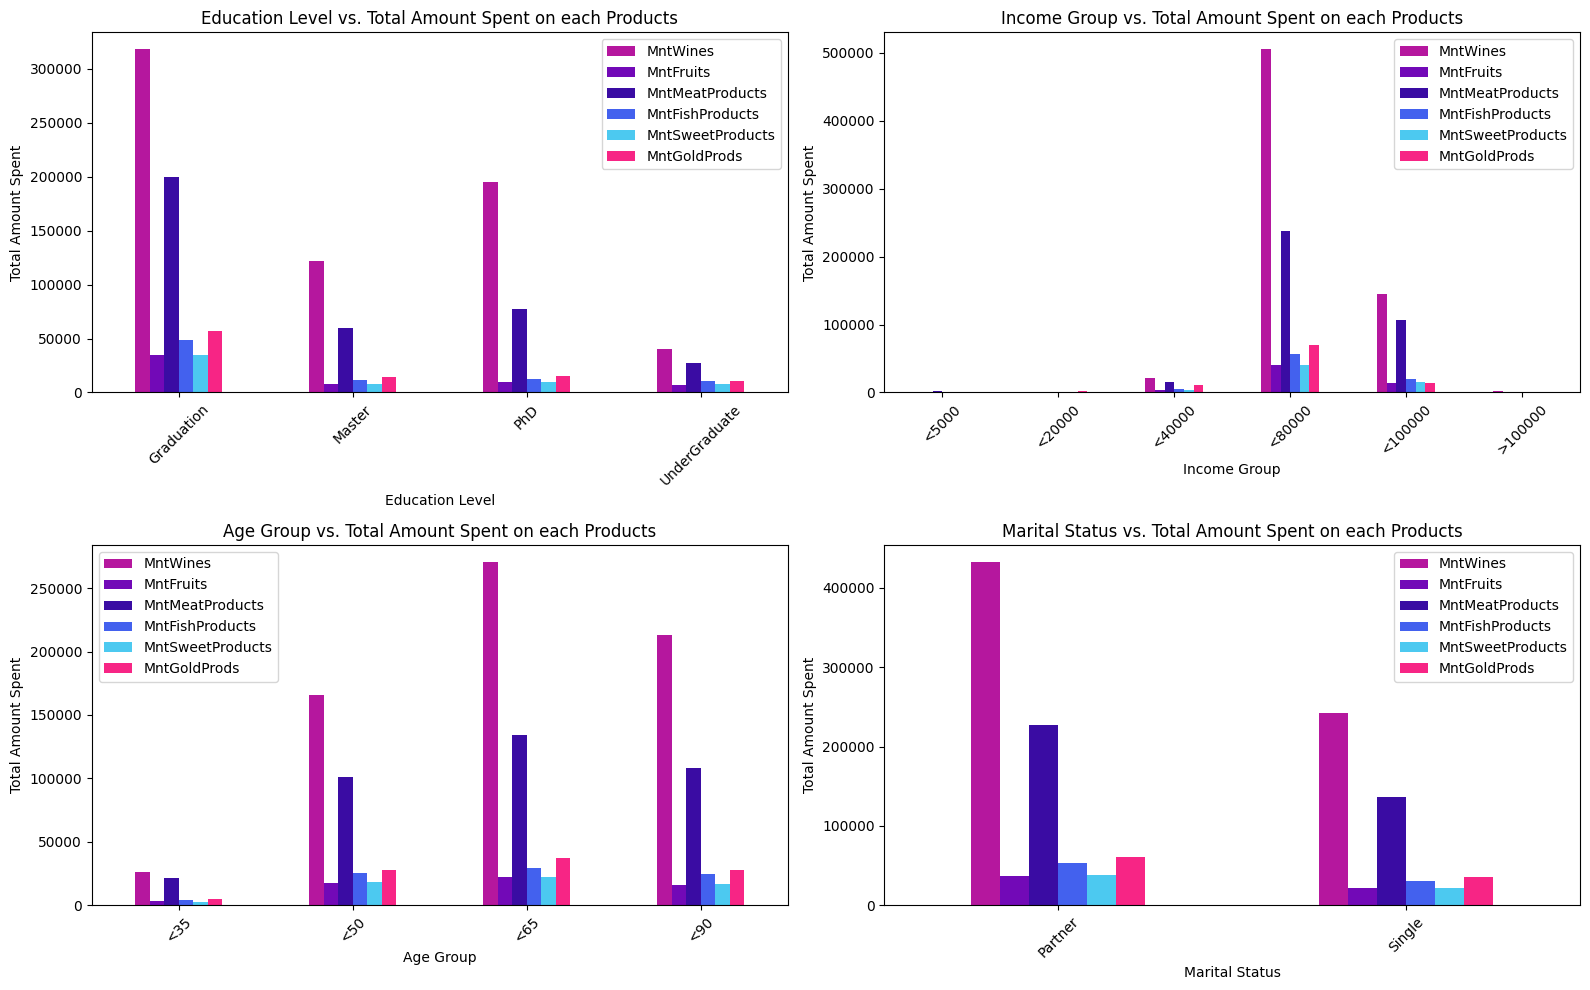

In [21]:
age_ranges = [(25, 35), (36, 50), (50, 65), (65, 90)]
age_labels = ['<35', '<50', '<65', '<90']

df['Age Group'] = pd.cut(df['Age'], bins=[range_[0] for range_ in age_ranges] + [max(range_[1] for range_ in age_ranges) + 1],
                            labels=age_labels, right=False)

income_ranges = [(0, 5000), (5001, 20000), (20001, 40000), (40001, 80000),(80001, 100000), (100001, 150000)]
income_labels = ['<5000', '<20000', '<40000', '<80000','<100000', '>100000' ]

df['Income Group'] = pd.cut(df['Income'], bins=[range_[0] for range_ in income_ranges] + [max(range_[1] for range_ in income_ranges) + 1],
                            labels=income_labels, right=False)

IncomeGroup_AmountSpent = df.groupby('Income Group')[['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()
AgeGroup_AmountSpent = df.groupby('Age Group')[['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()

Education_AmountSpent = df.groupby('Education')[['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()
MaritalStatus_AmountSpent = df.groupby('Marital_Status')[['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()

palette = ["#b5179e", "#7209B7", "#3A0CA3", "#4361EE", "#4CC9F0","#f72585"]
sns.set_palette(palette)
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

Education_AmountSpent.plot(kind='bar', ax=axes[0, 0])
axes[0, 0].set_title('Education Level vs. Total Amount Spent on each Products')
axes[0, 0].set_xlabel('Education Level')
axes[0, 0].set_ylabel('Total Amount Spent')
axes[0, 0].tick_params(axis='x', rotation=45)

IncomeGroup_AmountSpent.plot(kind='bar', ax=axes[0, 1])
axes[0, 1].set_title('Income Group vs. Total Amount Spent on each Products')
axes[0, 1].set_xlabel('Income Group')
axes[0, 1].set_ylabel('Total Amount Spent')
axes[0, 1].tick_params(axis='x', rotation=45)

AgeGroup_AmountSpent.plot(kind='bar', ax=axes[1, 0])
axes[1, 0].set_title('Age Group vs. Total Amount Spent on each Products')
axes[1, 0].set_xlabel('Age Group')
axes[1, 0].set_ylabel('Total Amount Spent')
axes[1, 0].tick_params(axis='x', rotation=45)

MaritalStatus_AmountSpent.plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_title('Marital Status vs. Total Amount Spent on each Products')
axes[1, 1].set_xlabel('Marital Status')
axes[1, 1].set_ylabel('Total Amount Spent')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

#### 3) Total No of Purchases Across Different Platforms 

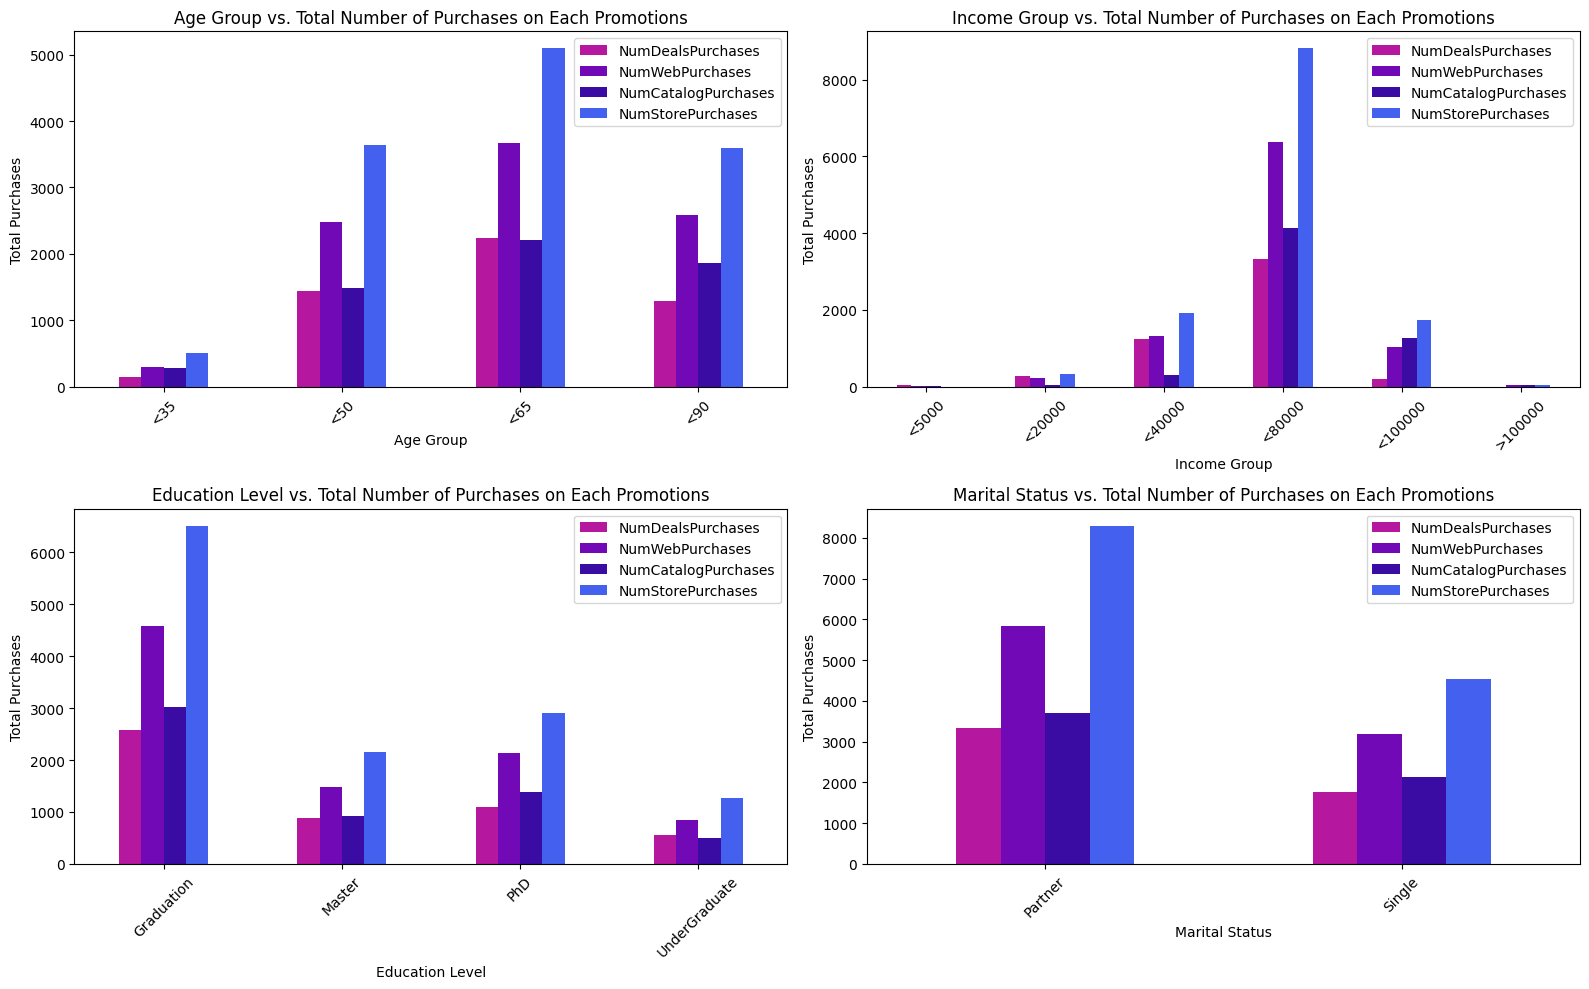

In [22]:
# Set the color palette
palette = ["#b5179e", "#7209B7", "#3A0CA3", "#4361EE", "#4CC9F0","#f72585"]
sns.set_palette(palette)

AgeGroup_purchases = df.groupby('Age Group')[['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases']].sum()
IncomeGroup_purchases = df.groupby('Income Group')[['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases']].sum()
education_purchases = df.groupby('Education')[['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases']].sum()
MaritalStatus_purchases = df.groupby('Marital_Status')[['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases']].sum()

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

AgeGroup_purchases.plot(kind='bar', ax=axes[0, 0])
axes[0, 0].set_title('Age Group vs. Total Number of Purchases on Each Promotions')
axes[0, 0].set_xlabel('Age Group')
axes[0, 0].set_ylabel('Total Purchases')
axes[0, 0].tick_params(axis='x', rotation=45)

IncomeGroup_purchases.plot(kind='bar',ax=axes[0, 1])
axes[0, 1].set_title('Income Group vs. Total Number of Purchases on Each Promotions')
axes[0, 1].set_xlabel('Income Group')
axes[0, 1].set_ylabel('Total Purchases')
axes[0, 1].tick_params(axis='x', rotation=45)

education_purchases.plot(kind='bar', ax=axes[1, 0])
axes[1, 0].set_title('Education Level vs. Total Number of Purchases on Each Promotions')
axes[1, 0].set_xlabel('Education Level')
axes[1, 0].set_ylabel('Total Purchases')
axes[1, 0].tick_params(axis='x', rotation=45)

MaritalStatus_purchases.plot(kind='bar',ax=axes[1, 1])
axes[1, 1].set_title('Marital Status vs. Total Number of Purchases on Each Promotions')
axes[1, 1].set_xlabel('Marital Status')
axes[1, 1].set_ylabel('Total Purchases')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

#### 4) Reponse of Education and Marital Status on all Promotions 

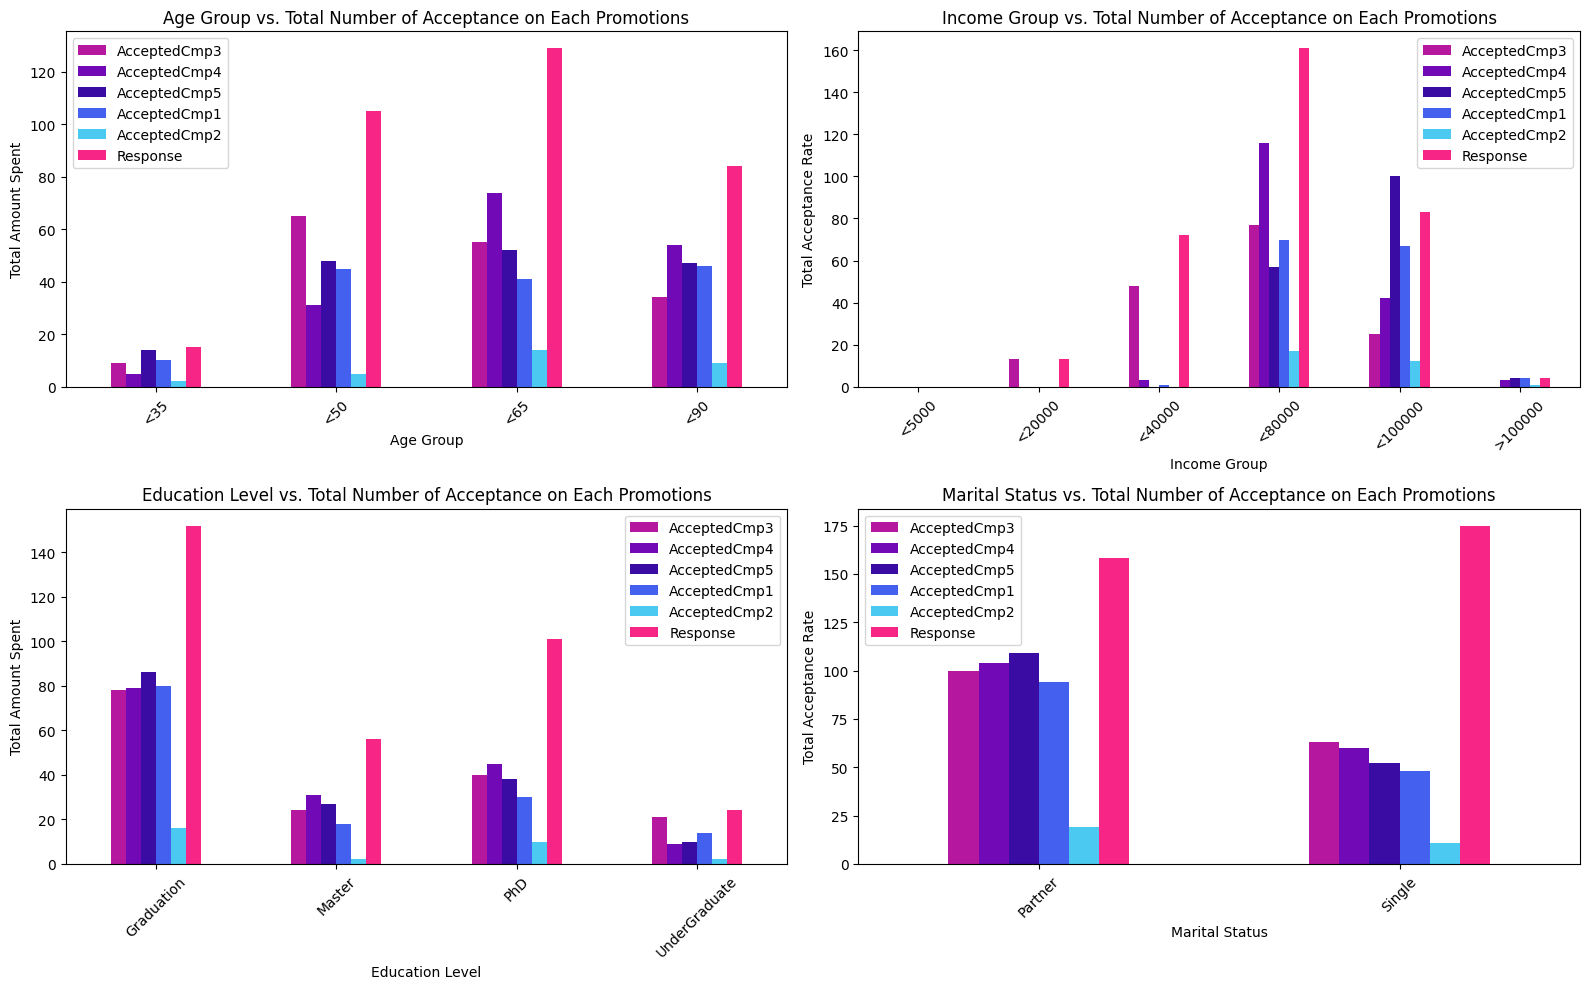

In [23]:
# Set the color palette
palette = ["#b5179e", "#7209B7", "#3A0CA3", "#4361EE", "#4CC9F0","#f72585"]
sns.set_palette(palette)

AgeGroup_promotion = df.groupby('Age Group')[['AcceptedCmp3','AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2','Response']].sum()
IncomeGroup_promotion = df.groupby('Income Group')[['AcceptedCmp3','AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2','Response']].sum()
education_promotion = df.groupby('Education')[['AcceptedCmp3','AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2','Response']].sum()
MaritalStatus_promotion = df.groupby('Marital_Status')[['AcceptedCmp3','AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2','Response']].sum()

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

AgeGroup_promotion.plot(kind='bar', ax=axes[0, 0])
axes[0, 0].set_title('Age Group vs. Total Number of Acceptance on Each Promotions')
axes[0, 0].set_xlabel('Age Group')
axes[0, 0].set_ylabel('Total Amount Spent')
axes[0, 0].tick_params(axis='x', rotation=45)

IncomeGroup_promotion.plot(kind='bar',ax=axes[0, 1])
axes[0, 1].set_title('Income Group vs. Total Number of Acceptance on Each Promotions')
axes[0, 1].set_xlabel('Income Group')
axes[0, 1].set_ylabel('Total Acceptance Rate')
axes[0, 1].tick_params(axis='x', rotation=45)

education_promotion.plot(kind='bar', ax=axes[1, 0])
axes[1, 0].set_title('Education Level vs. Total Number of Acceptance on Each Promotions')
axes[1, 0].set_xlabel('Education Level')
axes[1, 0].set_ylabel('Total Amount Spent')
axes[1, 0].tick_params(axis='x', rotation=45)

MaritalStatus_promotion.plot(kind='bar',ax=axes[1, 1])
axes[1, 1].set_title('Marital Status vs. Total Number of Acceptance on Each Promotions')
axes[1, 1].set_xlabel('Marital Status')
axes[1, 1].set_ylabel('Total Acceptance Rate')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### Feature Engineering

In [24]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
encoded = encoder.fit_transform(df[['Marital_Status','Education']])
encoded_data = pd.DataFrame(encoded.toarray(), columns=encoder.get_feature_names_out())

df.drop(['Marital_Status','Education'], axis = 1 , inplace = True)

df = pd.concat([df,encoded_data], axis = 1)

In [25]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
df["Day_of_Joining"] = df['Dt_Customer'].dt.day
df["Month_of_Joining"] = df['Dt_Customer'].dt.month
df["Year_of_Joining"] = df['Dt_Customer'].dt.year

df.drop(['Dt_Customer','Income Group','Age Group'], axis=1, inplace=True)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      2205 non-null   int64  
 1   Income                   2205 non-null   float64
 2   Kidhome                  2205 non-null   int64  
 3   Teenhome                 2205 non-null   int64  
 4   Recency                  2205 non-null   int64  
 5   MntWines                 2205 non-null   int64  
 6   MntFruits                2205 non-null   int64  
 7   MntMeatProducts          2205 non-null   int64  
 8   MntFishProducts          2205 non-null   int64  
 9   MntSweetProducts         2205 non-null   int64  
 10  MntGoldProds             2205 non-null   int64  
 11  NumDealsPurchases        2205 non-null   int64  
 12  NumWebPurchases          2205 non-null   int64  
 13  NumCatalogPurchases      2205 non-null   int64  
 14  NumStorePurchases       

### 

### Model Building

In [27]:
df1 = df.copy()

In [28]:
from sklearn.preprocessing import StandardScaler, RobustScaler
scalar = RobustScaler()

scaled_df = scalar.fit_transform(df1)
scaled_df

array([[ 0.72222222,  0.20707269,  0.        , ..., -0.8       ,
         0.42857143, -1.        ],
       [ 0.88888889, -0.14940305,  1.        , ..., -0.53333333,
        -0.42857143,  1.        ],
       [ 0.27777778,  0.61435696,  0.        , ...,  0.33333333,
         0.28571429,  0.        ],
       ...,
       [-0.61111111,  0.17210216,  0.        , ...,  0.6       ,
        -0.71428571,  1.        ],
       [ 0.77777778,  0.54278374,  0.        , ...,  0.53333333,
        -0.71428571,  1.        ],
       [ 0.88888889,  0.04781623,  1.        , ..., -0.06666667,
         0.57142857, -1.        ]])

In [29]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(data=principal_components ,columns=["PCA1","PCA2"])
pca_df

,PCA1,PCA2
0,4.618723,0.169934
1,-2.122884,-0.560353
2,1.381957,-0.316613
3,-2.053528,-1.028870
4,-0.112569,0.089822
...,...,...
2200,3.168576,1.810227
2201,-1.680978,2.073863
2202,0.615277,-0.778406
2203,1.167496,0.322311


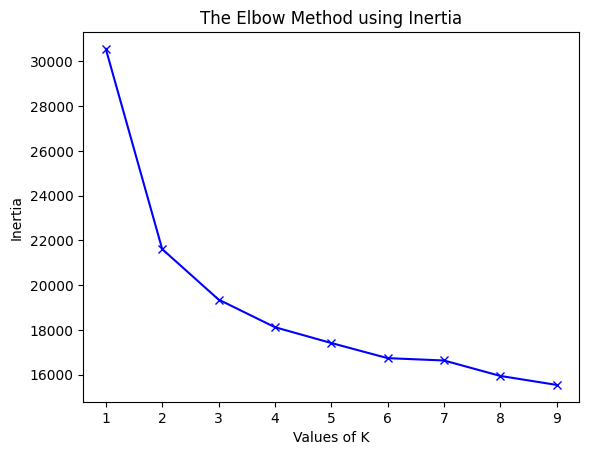

In [30]:
from sklearn.cluster import KMeans

inertia = []
range_val = range(1,10)
for i in range_val:
    kmean = KMeans(n_clusters=i)
    kmean.fit_predict(pd.DataFrame(scaled_df))
    inertia.append(kmean.inertia_)
plt.plot(range_val,inertia,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show()

In [31]:
from kneed import KneeLocator

kl = KneeLocator(range(1,10),inertia,curve="convex",direction="decreasing")

kl.elbow

3

In [32]:
from sklearn.cluster import KMeans

kmeans_model=KMeans(3)

kmeans_model.fit_predict(scaled_df)

#pca_df_kmeans= pd.concat([pca_df,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)
#pca_df_kmeans

pca_df['Cluster'] = kmeans_model.labels_
pca_df

,PCA1,PCA2,Cluster
0,4.618723,0.169934,2
1,-2.122884,-0.560353,1
2,1.381957,-0.316613,0
3,-2.053528,-1.028870,1
4,-0.112569,0.089822,0
...,...,...,...
2200,3.168576,1.810227,2
2201,-1.680978,2.073863,0
2202,0.615277,-0.778406,0
2203,1.167496,0.322311,0


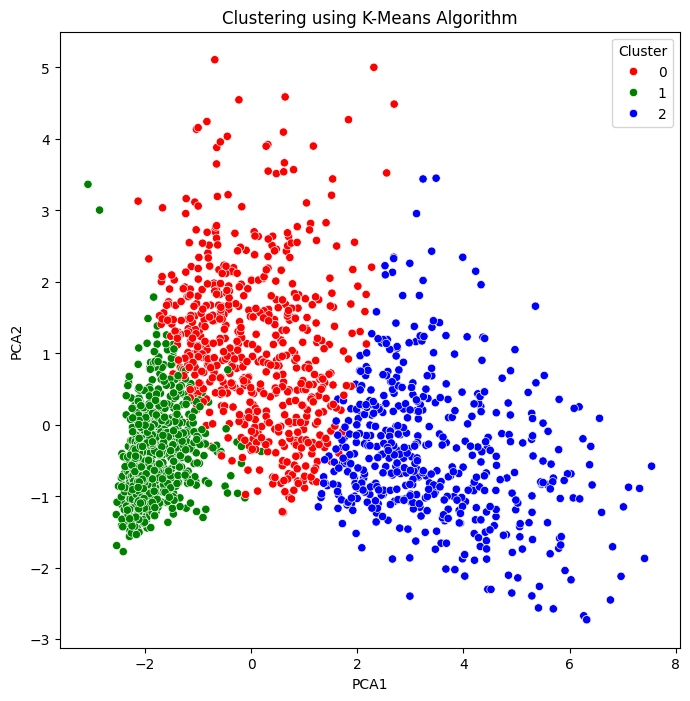

In [33]:
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x="PCA1",y="PCA2",hue="Cluster",data=pca_df,palette=['red','green','blue','black'])
plt.title("Clustering using K-Means Algorithm")
plt.show()

In [34]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score, silhouette_score

print(silhouette_score(pca_df, kmeans_model.labels_))
print(calinski_harabasz_score(pca_df, kmeans_model.labels_))
print(davies_bouldin_score(pca_df, kmeans_model.labels_))

0.5594711817585803
4018.5104457397947
0.6977210171350886


In [35]:
encoded_df = pd.concat([df,pd.DataFrame({'Cluster':kmeans_model.labels_})],axis=1)
encoded_df.head()

,Age,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Marital_Status_Partner,Marital_Status_Single,Education_Graduation,Education_Master,Education_PhD,Education_UnderGraduate,Day_of_Joining,Month_of_Joining,Year_of_Joining,Cluster
0,67,58138.0,0,0,58,635,88,546,172,88,...,0.0,1.0,1.0,0.0,0.0,0.0,4,9,2012,2
1,70,46344.0,1,1,38,11,1,6,2,1,...,0.0,1.0,1.0,0.0,0.0,0.0,8,3,2014,1
2,59,71613.0,0,0,26,426,49,127,111,21,...,1.0,0.0,1.0,0.0,0.0,0.0,21,8,2013,0
3,40,26646.0,1,0,26,11,4,20,10,3,...,1.0,0.0,1.0,0.0,0.0,0.0,10,2,2014,1
4,43,58293.0,1,0,94,173,43,118,46,27,...,1.0,0.0,0.0,0.0,1.0,0.0,19,1,2014,0


### Classification Models to predicted set Clusters

In [36]:
X = encoded_df.drop(labels=["Cluster"],axis = 1)   # Input features
Y = encoded_df["Cluster"]  

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.25, random_state = 0)

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

models = {
    "RandomForest": RandomForestClassifier(criterion="entropy"),
    "DecisionTreeClassifier": DecisionTreeClassifier(criterion="entropy"),
    "NaiveBayes": GaussianNB(),  
    "GradientBoosting": GradientBoostingClassifier()
}

In [43]:
from sklearn.metrics import accuracy_score

def evaluate_model(X_train,Y_train,X_test,Y_test,models):
    report = {}
    for i in range(len(models)):
        model = list(models.values())[i]        
        model.fit(X_train,Y_train)
        Y_test_predict = model.predict(X_test)
        score = accuracy_score(Y_test,Y_test_predict)
        report[list(models.keys())[i]] = score    
    return report

evaluate_model(X_train,Y_train,X_test,Y_test,models)

{'RandomForest': 0.9637681159420289,
 'DecisionTreeClassifier': 0.9257246376811594,
 'NaiveBayes': 0.9438405797101449,
 'GradientBoosting': 0.9746376811594203}

## 

### Customer Profiling

In [41]:
cluster_df = pd.concat([data,pd.DataFrame({'Cluster':kmeans_model.labels_})],axis=1)
cluster_df.head()

,Dt_Customer,Education,Age,Income,Marital_Status,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Cluster
0,04-09-2012,Graduation,67,58138.0,Single,0,0,58,635,88,...,8,10,4,0,0,0,0,0,1,2
1,08-03-2014,Graduation,70,46344.0,Single,1,1,38,11,1,...,1,1,2,0,0,0,0,0,0,1
2,21-08-2013,Graduation,59,71613.0,Partner,0,0,26,426,49,...,8,2,10,0,0,0,0,0,0,0
3,10-02-2014,Graduation,40,26646.0,Partner,1,0,26,11,4,...,2,0,4,0,0,0,0,0,0,1
4,19-01-2014,PhD,43,58293.0,Partner,1,0,94,173,43,...,5,3,6,0,0,0,0,0,0,0


In [169]:
cluster_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Dt_Customer          2205 non-null   object 
 1   Education            2205 non-null   object 
 2   Age                  2205 non-null   int64  
 3   Income               2205 non-null   float64
 4   Marital_Status       2205 non-null   object 
 5   Kidhome              2205 non-null   int64  
 6   Teenhome             2205 non-null   int64  
 7   Recency              2205 non-null   int64  
 8   MntWines             2205 non-null   int64  
 9   MntFruits            2205 non-null   int64  
 10  MntMeatProducts      2205 non-null   int64  
 11  MntFishProducts      2205 non-null   int64  
 12  MntSweetProducts     2205 non-null   int64  
 13  MntGoldProds         2205 non-null   int64  
 14  NumDealsPurchases    2205 non-null   int64  
 15  NumWebPurchases      2205 non-null   i

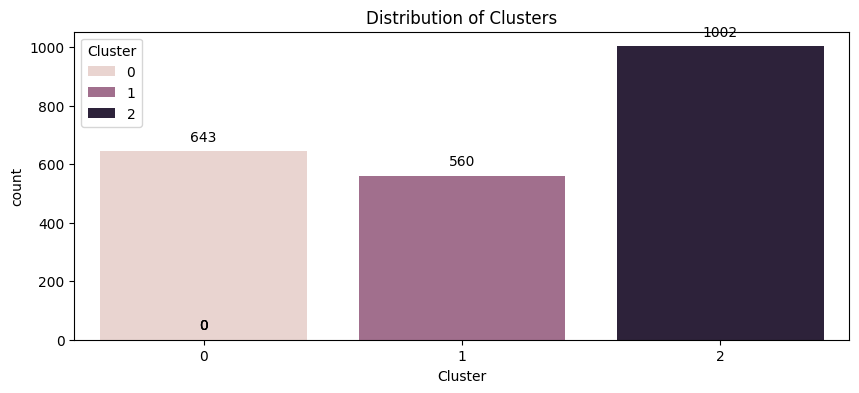

In [170]:
plt.figure(figsize=(10, 4))
ax = sns.countplot(x='Cluster', data=cluster_df, hue='Cluster')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')
plt.title('Distribution of Clusters', fontsize=12)
plt.show()

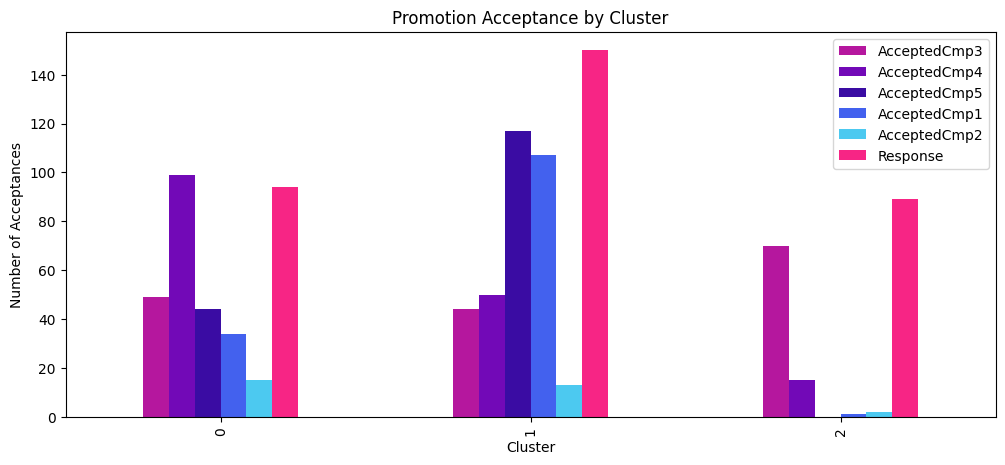

In [171]:
# Group the data by clusters and sum the promotion acceptances
Clusters_promotion = cluster_df.groupby('Cluster')[['AcceptedCmp3','AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2','Response']].sum()

palette = ["#b5179e", "#7209B7", "#3A0CA3", "#4361EE", "#4CC9F0","#f72585"]

ax = Clusters_promotion.plot(kind='bar', figsize=(12, 5),color = palette)

plt.title('Promotion Acceptance by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Acceptances')

plt.show()

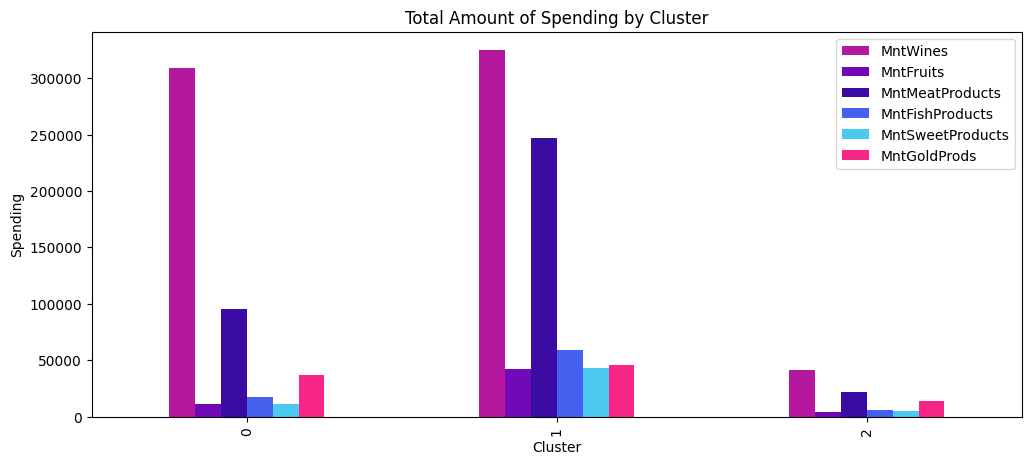

In [172]:
# Group the data by clusters and sum the promotion acceptances
Clusters_Spending = cluster_df.groupby('Cluster')[['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()
palette = ["#b5179e", "#7209B7", "#3A0CA3", "#4361EE", "#4CC9F0","#f72585"]

ax = Clusters_Spending.plot(kind='bar', figsize=(12, 5), color=palette)

# Set the title and labels
plt.title('Total Amount of Spending by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Spending')

# Show the plot
plt.show()

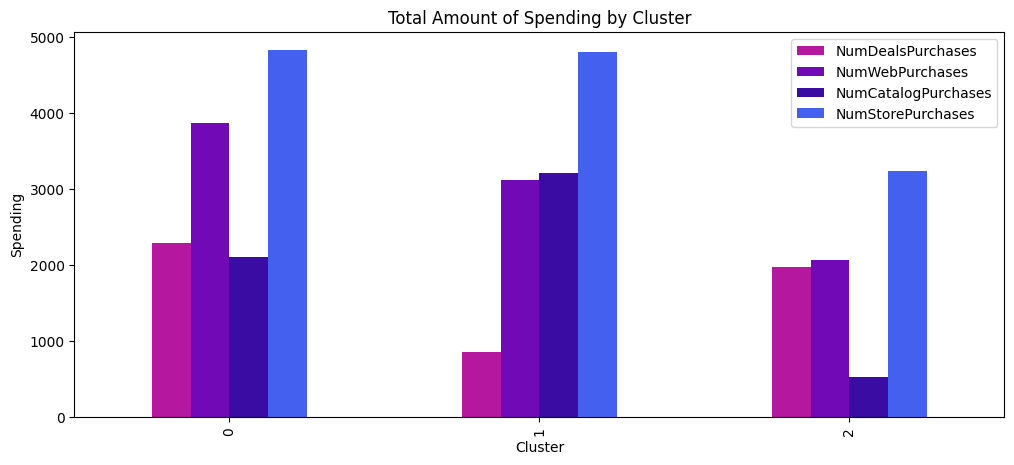

In [173]:
# Group the data by clusters and sum the promotion acceptances
Clusters_Spending = cluster_df.groupby('Cluster')[['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases']].sum()
palette = ["#b5179e", "#7209B7", "#3A0CA3", "#4361EE", "#4CC9F0","#f72585"]

ax = Clusters_Spending.plot(kind='bar', figsize=(12, 5), color=palette)

# Set the title and labels
plt.title('Total Amount of Spending by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Spending')

# Show the plot
plt.show()

### Cluster0 Profiling

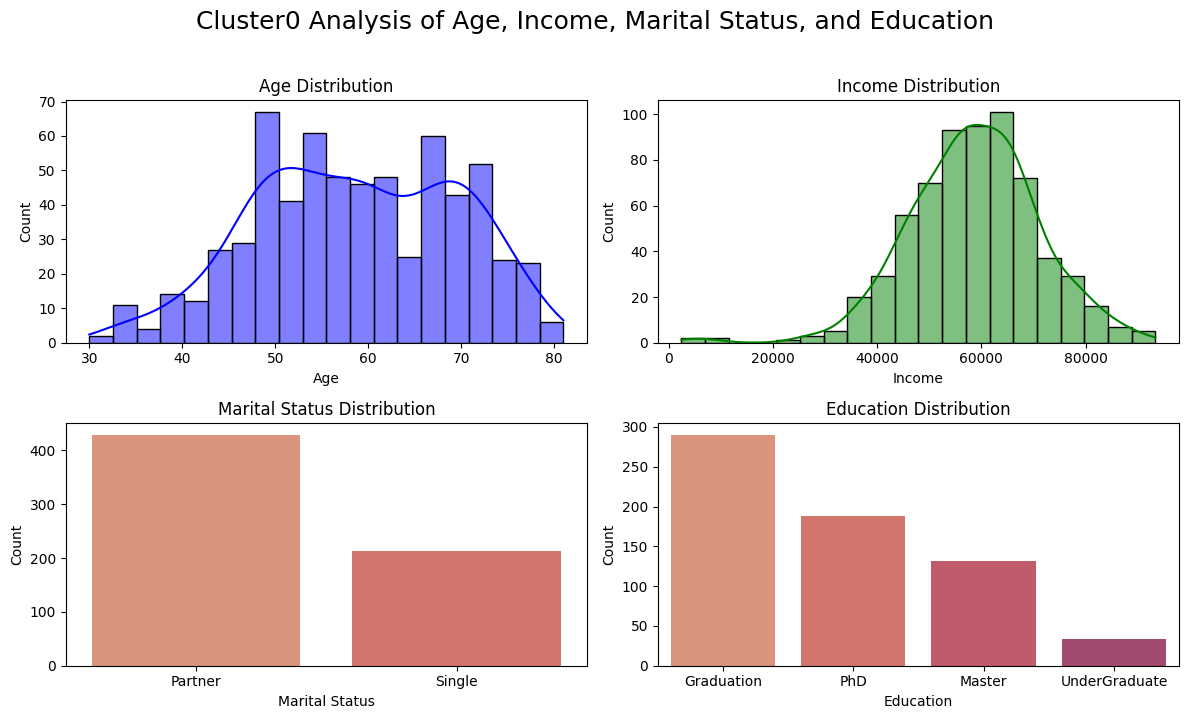

In [174]:
cluster0 = cluster_df[cluster_df['Cluster'] == 0 ]
fig, axs = plt.subplots(2, 2, figsize=(12, 7))

palette = sns.color_palette("flare")

sns.histplot(cluster0['Age'], bins=20, kde=True, ax=axs[0, 0], color = 'blue')
axs[0, 0].set_title('Age Distribution')
axs[0, 0].set_xlabel('Age')

sns.histplot(cluster0['Income'], bins=20, kde=True, ax=axs[0, 1], color = 'green')
axs[0, 1].set_title('Income Distribution')
axs[0, 1].set_xlabel('Income')

sns.countplot(data=cluster0, x='Marital_Status', ax=axs[1, 0], palette = palette)
axs[1, 0].set_title('Marital Status Distribution')
axs[1, 0].set_xlabel('Marital Status')
axs[1, 0].set_ylabel('Count')

sns.countplot(data=cluster0, x='Education', ax=axs[1, 1], palette = palette)
axs[1, 1].set_title('Education Distribution')
axs[1, 1].set_xlabel('Education')
axs[1, 1].set_ylabel('Count')

plt.suptitle('Cluster0 Analysis of Age, Income, Marital Status, and Education', fontsize=18, y=1.02)

plt.tight_layout()
plt.show()

### Cluster=1 Profiling

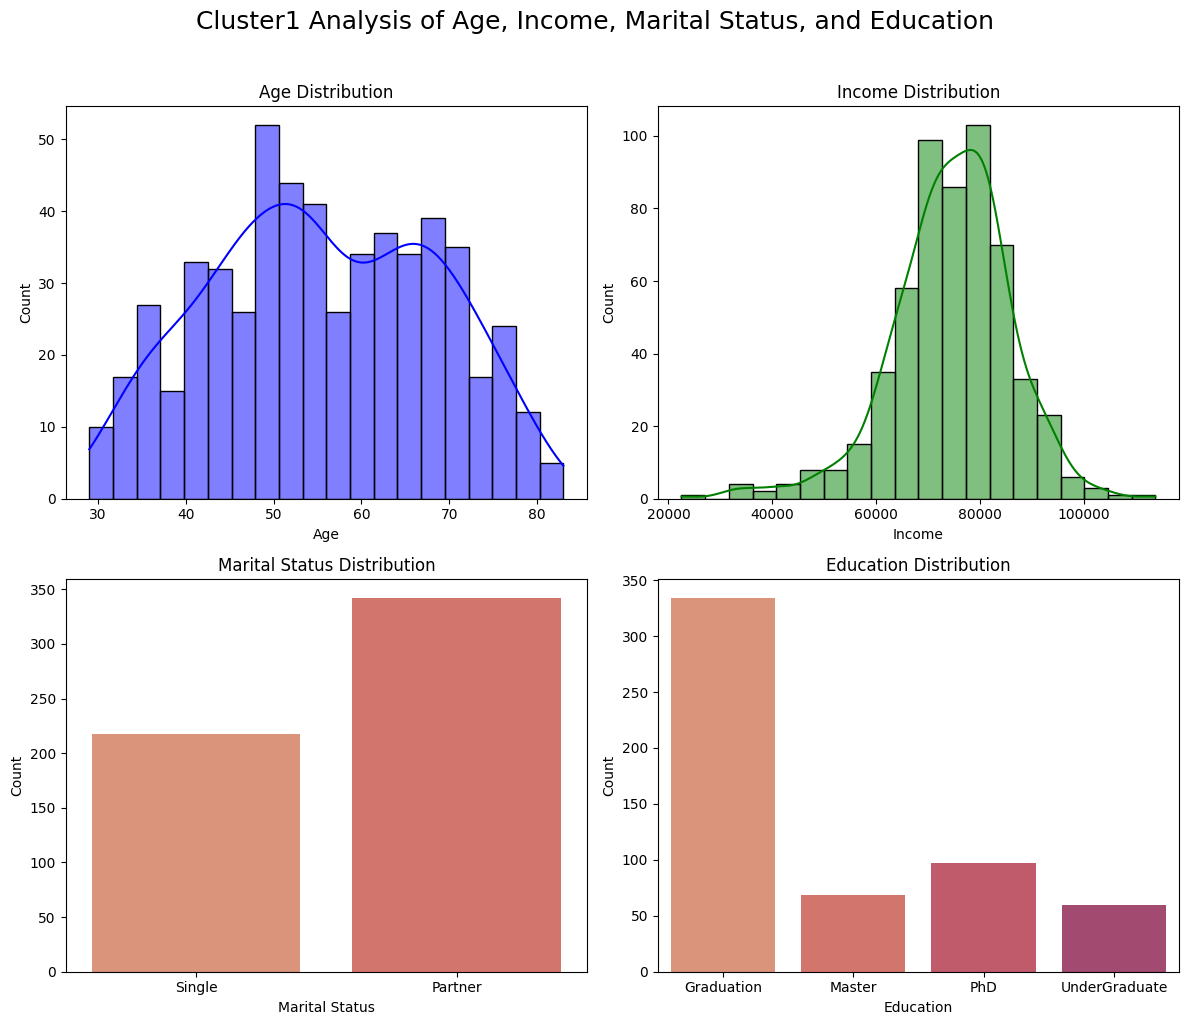

In [175]:
cluster1 = cluster_df[cluster_df['Cluster'] == 1 ]
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

palette = sns.color_palette("flare")

sns.histplot(cluster1['Age'], bins=20, kde=True, ax=axs[0, 0], color = 'blue')
axs[0, 0].set_title('Age Distribution')
axs[0, 0].set_xlabel('Age')

sns.histplot(cluster1['Income'], bins=20, kde=True, ax=axs[0, 1], color = 'green')
axs[0, 1].set_title('Income Distribution')
axs[0, 1].set_xlabel('Income')

sns.countplot(data=cluster1, x='Marital_Status', ax=axs[1, 0], palette = palette)
axs[1, 0].set_title('Marital Status Distribution')
axs[1, 0].set_xlabel('Marital Status')
axs[1, 0].set_ylabel('Count')

sns.countplot(data=cluster1, x='Education', ax=axs[1, 1], palette = palette)
axs[1, 1].set_title('Education Distribution')
axs[1, 1].set_xlabel('Education')
axs[1, 1].set_ylabel('Count')

plt.suptitle('Cluster1 Analysis of Age, Income, Marital Status, and Education', fontsize=18, y=1.02)

plt.tight_layout()
plt.show()

### Cluster=2 Profiling

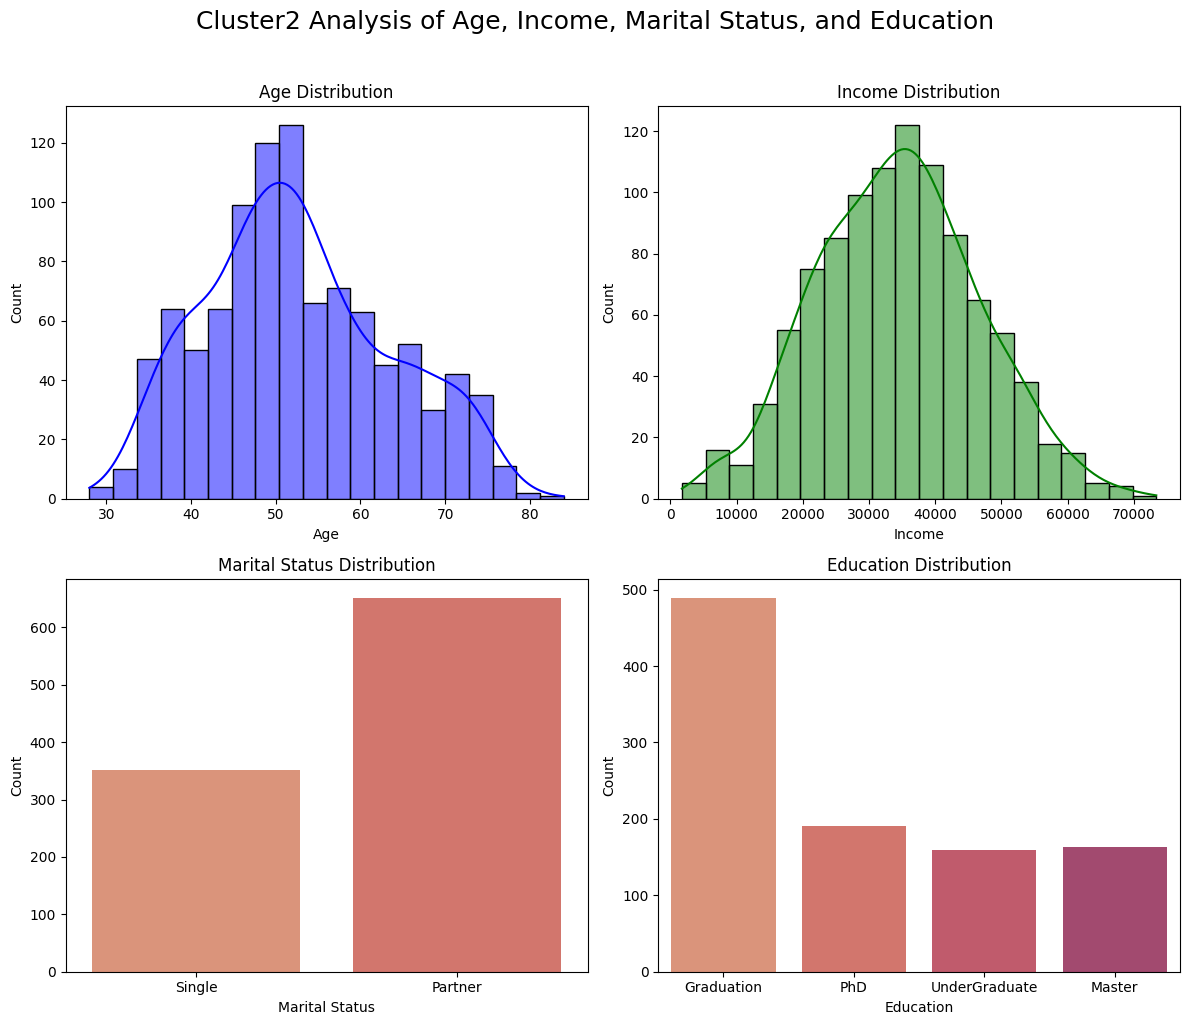

In [176]:
cluster2 = cluster_df[cluster_df['Cluster'] == 2 ]
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

palette = sns.color_palette("flare")

sns.histplot(cluster2['Age'], bins=20, kde=True, ax=axs[0, 0], color = 'blue')
axs[0, 0].set_title('Age Distribution')
axs[0, 0].set_xlabel('Age')

sns.histplot(cluster2['Income'], bins=20, kde=True, ax=axs[0, 1], color = 'green')
axs[0, 1].set_title('Income Distribution')
axs[0, 1].set_xlabel('Income')

sns.countplot(data=cluster2, x='Marital_Status', ax=axs[1, 0], palette = palette)
axs[1, 0].set_title('Marital Status Distribution')
axs[1, 0].set_xlabel('Marital Status')
axs[1, 0].set_ylabel('Count')

sns.countplot(data=cluster2, x='Education', ax=axs[1, 1], palette = palette)
axs[1, 1].set_title('Education Distribution')
axs[1, 1].set_xlabel('Education')
axs[1, 1].set_ylabel('Count')

plt.suptitle('Cluster2 Analysis of Age, Income, Marital Status, and Education', fontsize=18, y=1.02)

plt.tight_layout()
plt.show()

## Conclusion
- Since The Dataset is very old , Age is widely distribued throughout all clusters, estimated avg range is 35 - 75 age, soo not considering this feature
- Distribution of Customers based on Marital_Status and Education no as such Difference is found among them throughout all clusters
- 2:1 ratio between Partner and Single & 3:1:1:1 ratio among Graduation, PHD, Masters, Undergraduate 
  
- Income is well Distributed soo I am naming ranges as 25k - 45k dollars lower Middle Class, 45k - 65k Middle Class, 65k - 100k Rich Class

- Soo, Finally the Analysis is done on the basis of Income, Purchase Platforms, Total Spending, Response of Promotion Campaigns

- **Cluster0** : The Customer lies in Middle Class Category, Does Shopping Across All Platforms, Spents a Lot on Wines and very on other products, Moderate Response on Promotion Campaigns

- **Cluster1** : The Customer lies in Rich Class Category, Does Shopping Across All Patflorms doesn't rely on Discouted Products, Spents a Lot on Wines and Meat and very few on other products, Very High Response on Promotion Campaigns

- **Cluster2** : The Customer lies in Lower Middle Class Category, Does Shopping Across All Platforms except Catalog, Spents Less on all of our products, Less Response on Promotion Campaings